# Flood prediction system

In [44]:
#Import some basic libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore') 

# Data Insight

In [45]:
#Read the data present in dataset
data = pd.read_csv('kerala.csv')
#Using data.head() we can see the top 5 rows of the dataset
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [46]:
data.info

<bound method DataFrame.info of     SUBDIVISION  YEAR   JAN   FEB   MAR    APR    MAY     JUN     JUL     AUG  \
0        KERALA  1901  28.7  44.7  51.6  160.0  174.7   824.6   743.0   357.5   
1        KERALA  1902   6.7   2.6  57.3   83.9  134.5   390.9  1205.0   315.8   
2        KERALA  1903   3.2  18.6   3.1   83.6  249.7   558.6  1022.5   420.2   
3        KERALA  1904  23.7   3.0  32.2   71.5  235.7  1098.2   725.5   351.8   
4        KERALA  1905   1.2  22.3   9.4  105.9  263.3   850.2   520.5   293.6   
..          ...   ...   ...   ...   ...    ...    ...     ...     ...     ...   
113      KERALA  2014   4.6  10.3  17.9   95.7  251.0   454.4   677.8   733.9   
114      KERALA  2015   3.1   5.8  50.1  214.1  201.8   563.6   406.0   252.2   
115      KERALA  2016   2.4   3.8  35.9  143.0  186.4   522.2   412.3   325.5   
116     KERALA   2017   1.9   6.8   8.9   43.6  173.5   498.5   319.6   531.8   
117      KERALA  2018  29.1  52.1  48.6  116.4  183.8   625.4  1048.5  1398.9

In [47]:
#We want the data in numbers, therefore we will replace the yes/no in floods coloumn by 1/0
data['FLOODS'].replace(['YES','NO'],[1,0],inplace=True)

In [48]:
#Let's see how are data looks like now
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0


In [49]:
#Now let's seperate the data which we are gonna use for prediction
x = data.iloc[:,1:14]
x.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2


In [50]:
#Now seperate the flood label from the dataset
y = data.iloc[:, -1]
y.head()

0    1
1    1
2    1
3    1
4    0
Name: FLOODS, dtype: int64

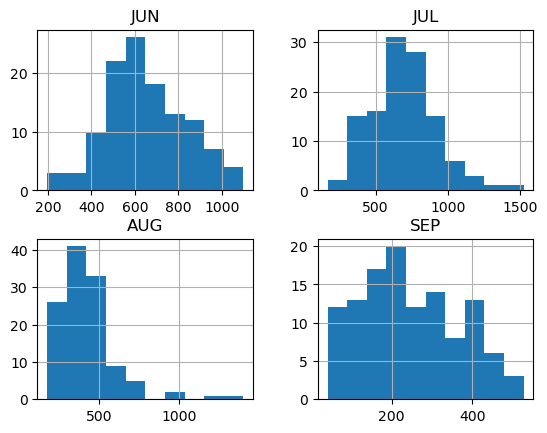

In [51]:
#Let's see hoe the rainfall index vary during rainy season
import matplotlib.pyplot as plt
%matplotlib inline
c = data[['JUN','JUL','AUG','SEP']]
c.hist()
plt.show()

In [52]:
#Data might be widely distributed so let's scale it between 0 and 1
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.        , 0.34371257, 0.56582278, ..., 0.39727673, 0.95570189,
        0.2388724 ],
       [0.00854701, 0.08023952, 0.03291139, ..., 0.5804966 , 0.37952709,
        0.60039565],
       [0.01709402, 0.03832335, 0.23544304, ..., 0.57188626, 0.37563604,
        0.29129575],
       ...,
       [0.98290598, 0.02874251, 0.04810127, ..., 0.31517821, 0.28105358,
        0.11622156],
       [0.99145299, 0.02275449, 0.08607595, ..., 0.24809772, 0.18258007,
        0.18793274],
       [1.        , 0.34850299, 0.65949367, ..., 0.57589107, 0.28105358,
        0.3214639 ]])

In [53]:
#Let's divide the dataset into 2 sets:train and test in ratio (4:1)
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [54]:
#Let's see how our train set looks like
x_train.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
51,1952,5.2,48.2,20.8,112.2,214.6,576.7,430.0,413.6,57.4,339.6,49.6,66.9
64,1965,9.1,0.9,28.3,109.8,214.5,597.7,465.1,296.1,150.1,183.7,131.7,155.5
78,1979,2.4,30.0,11.7,42.0,127.7,582.9,662.2,383.7,211.7,163.8,261.7,23.3
53,1954,23.5,2.8,90.6,136.9,179.5,798.3,640.5,467.0,201.6,303.1,31.6,62.5
86,1987,0.6,0.8,4.3,57.2,108.3,572.6,221.0,396.6,157.0,272.1,216.0,131.1


In [55]:
y_train.head()

51    0
64    0
78    0
53    1
86    0
Name: FLOODS, dtype: int64

# Prediction Algorithms:

# 1. KNN Classifier

In [56]:
clf = neighbors.KNeighborsClassifier()
knn_clf = clf.fit(x_train,y_train)

In [57]:
#Let's predict chances of flood
y_predict = knn_clf.predict(x_test)
print('predicted chances of flood')
print(y_predict)

predicted chances of flood
[0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0]


In [58]:
#Actual chances of flood
print("actual values of floods:")
print(y_test)

actual values of floods:
72     0
89     0
3      1
104    1
30     1
35     1
93     1
61     1
31     1
110    1
5      0
22     1
97     1
2      1
63     0
68     0
69     0
62     0
94     0
46     1
1      1
102    0
112    1
4      0
Name: FLOODS, dtype: int64


In [59]:
from sklearn.model_selection import cross_val_score

In [60]:
knn_accuracy = cross_val_score(knn_clf,x_test,y_test,cv=3,scoring='accuracy',n_jobs=-1)

In [61]:
knn_accuracy.mean()

0.625

# 2. Logistic Regression

In [62]:
x_train_std = minmax.fit_transform(x_train)
x_test_std = minmax.transform(x_test)

In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_clf = lr.fit(x_train_std,y_train)

lr_accuracy = cross_val_score(lr_clf,x_test_std,y_test,cv=3,scoring='accuracy',n_jobs=-1)

In [64]:
lr_accuracy.mean()

0.6666666666666666

In [65]:
y_predict = lr_clf.predict(x_test_std)
print('Predicted chances of flood')
print(y_predict)

Predicted chances of flood
[0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0]


In [66]:
print('Actual chances of flood')
print(y_test.values)

Actual chances of flood
[0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0]


In [67]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score: %f"%(accuracy_score(y_test,y_predict)*100))
print("recall score: %f"%(recall_score(y_test,y_predict)*100))
print("roc score: %f"%(roc_auc_score(y_test,y_predict)*100))
conf_matrix = confusion_matrix(y_test, y_predict)
print(conf_matrix)


accuracy score: 87.500000
recall score: 78.571429
roc score: 89.285714
[[10  0]
 [ 3 11]]


# 3. Decision tree classification

In [68]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf = DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)
dtc_clf_acc = cross_val_score(dtc_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
dtc_clf_acc

array([0.5625    , 0.67741935, 0.74193548])

In [69]:
#Predicted flood chances
y_pred = dtc_clf.predict(x_test)
print(y_pred)

[0 0 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0]


In [70]:
#Actual flood chances
print("actual values:")
print(y_test.values)

actual values:
[0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0]


In [71]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


accuracy score:79.166667
recall score:71.428571
roc score:80.714286
[[ 9  1]
 [ 4 10]]


# 4. Random Forest Classification

In [72]:
from sklearn.ensemble import RandomForestClassifier
rmf = RandomForestClassifier(max_depth=3,random_state=0)
rmf_clf = rmf.fit(x_train,y_train)
print(rmf_clf)

RandomForestClassifier(max_depth=3, random_state=0)


In [73]:
rmf_clf_acc = cross_val_score(rmf_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
#rmf_proba = cross_val_predict(rmf_clf,x_train_std,y_train,cv=3,method='predict_proba')

In [74]:
rmf_clf_acc

array([0.625     , 0.83870968, 0.83870968])

In [75]:
#Predicted flood chances
y_pred = rmf_clf.predict(x_test)

In [76]:
print(y_pred)

[0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0]


In [77]:
#Actual flood chances
print("actual values:")
print(y_test.values)

actual values:
[0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0]


In [78]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


accuracy score:79.166667
recall score:71.428571
roc score:80.714286
[[ 9  1]
 [ 4 10]]


# 5. Enseble Learning

In [79]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
knn_clf = KNeighborsClassifier()

voting = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf)],
    voting='hard')

In [80]:
voting_clf = voting.fit(x_train, y_train)

In [81]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, knn_clf, voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9583333333333334
RandomForestClassifier 0.625
KNeighborsClassifier 0.8333333333333334
VotingClassifier 0.875


# Comparing all the prediction models

In [82]:
models = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('EL', VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf)],
    voting='hard')))


names = []
scores = []
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.833333
1   LR  0.958333
2   DT  0.833333
3   RF  0.833333
4   EL  0.875000


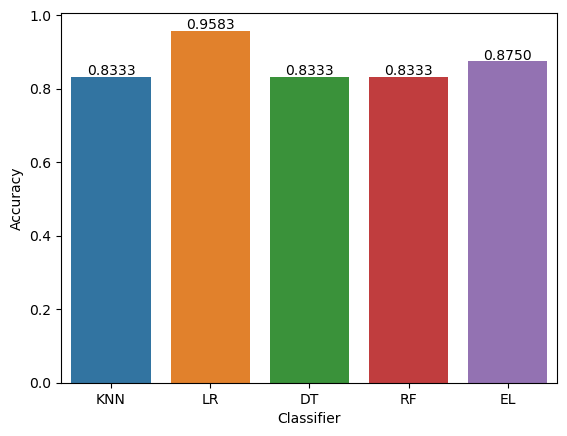

In [83]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

In [84]:
# List of models and their corresponding accuracies
models = [
    ('KNN', knn_accuracy.mean()),
    ('LR', lr_accuracy.mean()),
    ('DT', dtc_clf_acc.mean()),
    ('RF', rmf_clf_acc.mean()),
    ('EL', max(rmf_clf_acc)) 
    # Assuming you want to compare the RandomForest part of Ensemble Learning
]

# Find the model with the highest accuracy
best_model = max(models, key=lambda x: x[1])

# Print the best model and its accuracy
print(f"Best Model: {best_model[0]}, Accuracy: {best_model[1]*100}%")

Best Model: EL, Accuracy: 83.87096774193549%
